In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
from IPython.display import display

There are 25 variables:

- `ID`: ID of each client
- `LIMIT_BAL`: Amount of given credit in NT dollars (includes individual and family/supplementary credit
- `GENDER`: Gender (male,female)
- `EDUCATION`: (1=graduate school, 2=university, 3=high school, 4=others)
- `MARRIAGE`: Marital status (married, single, others)
- `AGE`: Age in years
- `PAY_1`: Repayment status in September, 2005 (0=pay duly, 1=payment delay for one month, 2=payment delay for two months, ... 8=payment delay for eight months, 9=payment delay for nine months and above)
- `PAY_2`: Repayment status in August, 2005 (scale same as above)
- `PAY_3`: Repayment status in July, 2005 (scale same as above)
- `PAY_4`: Repayment status in June, 2005 (scale same as above)
- `PAY_5`: Repayment status in May, 2005 (scale same as above)
- `PAY_6`: Repayment status in April, 2005 (scale same as above)
- `BILL_AMT1`: Amount of bill statement in September, 2005 (NT dollar)
- `BILL_AMT2`: Amount of bill statement in August, 2005 (NT dollar)
- `BILL_AMT3`: Amount of bill statement in July, 2005 (NT dollar)
- `BILL_AMT4`: Amount of bill statement in June, 2005 (NT dollar)
- `BILL_AMT5`: Amount of bill statement in May, 2005 (NT dollar)
- `BILL_AMT6`: Amount of bill statement in April, 2005 (NT dollar)
- `PAY_AMT1`: Amount of previous payment in September, 2005 (NT dollar)
- `PAY_AMT2`: Amount of previous payment in August, 2005 (NT dollar)
- `PAY_AMT3`: Amount of previous payment in July, 2005 (NT dollar)
- `PAY_AMT4`: Amount of previous payment in June, 2005 (NT dollar)
- `PAY_AMT5`: Amount of previous payment in May, 2005 (NT dollar)
- `PAY_AMT6`: Amount of previous payment in April, 2005 (NT dollar)
- `default.payment.next.month`: Default payment (yes,no)

In [2]:
df = pd.read_csv('./datasets/credit_card_cleaned.csv')
df.head()

,Unnamed: 0,ID,LIMIT_BAL,GENDER,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,0,1,20000.0,female,2,married,24,2,2,0,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,1,2,120000.0,female,2,single,26,0,2,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,2,3,90000.0,female,2,single,34,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,3,4,50000.0,female,2,married,37,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,4,5,50000.0,male,2,married,57,0,0,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


# 1. Summary Stats
#### Numerical variables
- mean
- median
- quartile

In [3]:
df[['AGE']].describe()

,AGE
count,30000.000000
mean,35.485500
std,9.217904
min,21.000000
25%,28.000000
50%,34.000000
75%,41.000000
max,79.000000


Conclude
- Average age: 35
- $75^{th}$ percentile age: 41
    + 75% people below 41

#### Categorical variables

In [4]:
# Counts for each value of GENDER
print('Value counts of GENDER :')
print(df['GENDER'].value_counts(), end='\n\n')

# Counts for each value of MARRIAGE
print('Value counts of MARRIAGE :')
print(df['MARRIAGE'].value_counts(), end='\n\n')

# Counts for each value of EDUCATION
print('Value counts of EDUCATION :')
print(df['EDUCATION'].value_counts(), end='\n\n')

Value counts of GENDER :
female    18112
male      11888
Name: GENDER, dtype: int64

Value counts of MARRIAGE :
single     15964
married    13659
other        377
Name: MARRIAGE, dtype: int64

Value counts of EDUCATION :
2    14030
1    10585
3     4917
4      468
Name: EDUCATION, dtype: int64



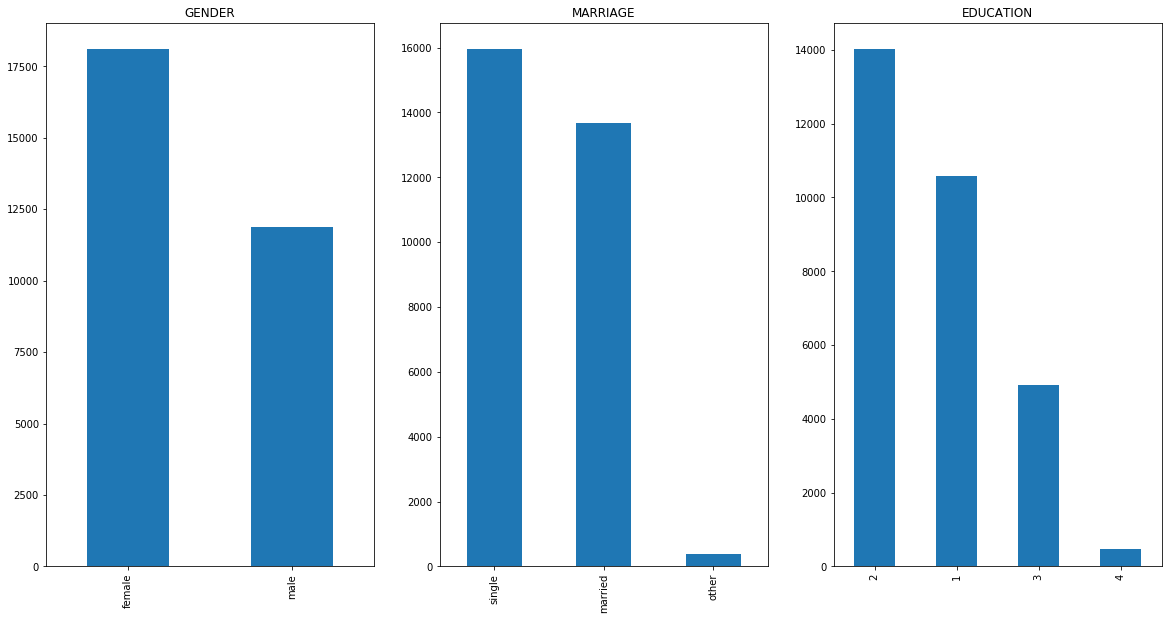

In [5]:
# Plots
fig, sub_plots = plt.subplots(
    nrows=1, ncols=3,
    figsize=(20,10))

df['GENDER'].value_counts().plot(
    kind='bar',
    ax=sub_plots[0],
    title='GENDER')
df['MARRIAGE'].value_counts().plot(
    kind='bar',
    ax=sub_plots[1],
    title='MARRIAGE')
df['EDUCATION'].value_counts().plot(
    kind='bar',
    ax=sub_plots[2],
    title='EDUCATION')

plt.show()

Conclude
- More females than males
- Almost balanced married and unmarried
- Most people have gone to University > Graduate School > High School

#### Distributions

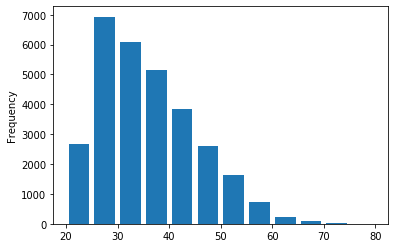

(25.0, 30.0]      7142
(30.0, 35.0]      5796
(35.0, 40.0]      4917
(19.999, 25.0]    3871
(40.0, 45.0]      3605
(45.0, 50.0]      2400
(50.0, 55.0]      1425
(55.0, 60.0]       572
(60.0, 65.0]       186
(65.0, 70.0]        71
(70.0, 75.0]        14
(75.0, 80.0]         1
Name: AGE, dtype: int64

In [6]:
# Make bins and plot
df['AGE'].plot(
    kind='hist',
    bins=[20,25,30,35,40,45,50,55,60,65,70,75,80],
    rwidth=0.8)
plt.show()

# counts in each bin
df['AGE'].value_counts(
    bins=[20,25,30,35,40,45,50,55,60,65,70,75,80])

Conclude
- The greatest number of people in [25,30] age group.
- The majority of the people  in the [20,40] age group.

#### Skeweness
- Negative skewness = left skewed
    + left tail of the distribution is longer
    + = there are more values towards the left side of the distribution

- Positive skewness = right skewed
    + right tail of the distribution is longer
    + = there are more values towards the right side of the distribution

<img src="./assets/1.jpg" width="600"/>

In [7]:
df.skew()

Unnamed: 0                     0.000000
ID                             0.000000
LIMIT_BAL                      0.992867
EDUCATION                      0.489720
AGE                            0.732246
PAY_1                          2.809797
PAY_2                          2.598928
PAY_3                          2.856586
PAY_4                          3.547022
PAY_5                          3.966571
PAY_6                          3.821385
BILL_AMT1                      2.663861
BILL_AMT2                      2.705221
BILL_AMT3                      3.087830
BILL_AMT4                      2.821965
BILL_AMT5                      2.876380
BILL_AMT6                      2.846645
PAY_AMT1                      14.668364
PAY_AMT2                      30.453817
PAY_AMT3                      17.216635
PAY_AMT4                      12.904985
PAY_AMT5                      11.127417
PAY_AMT6                      10.640727
default.payment.next.month     1.343504
dtype: float64

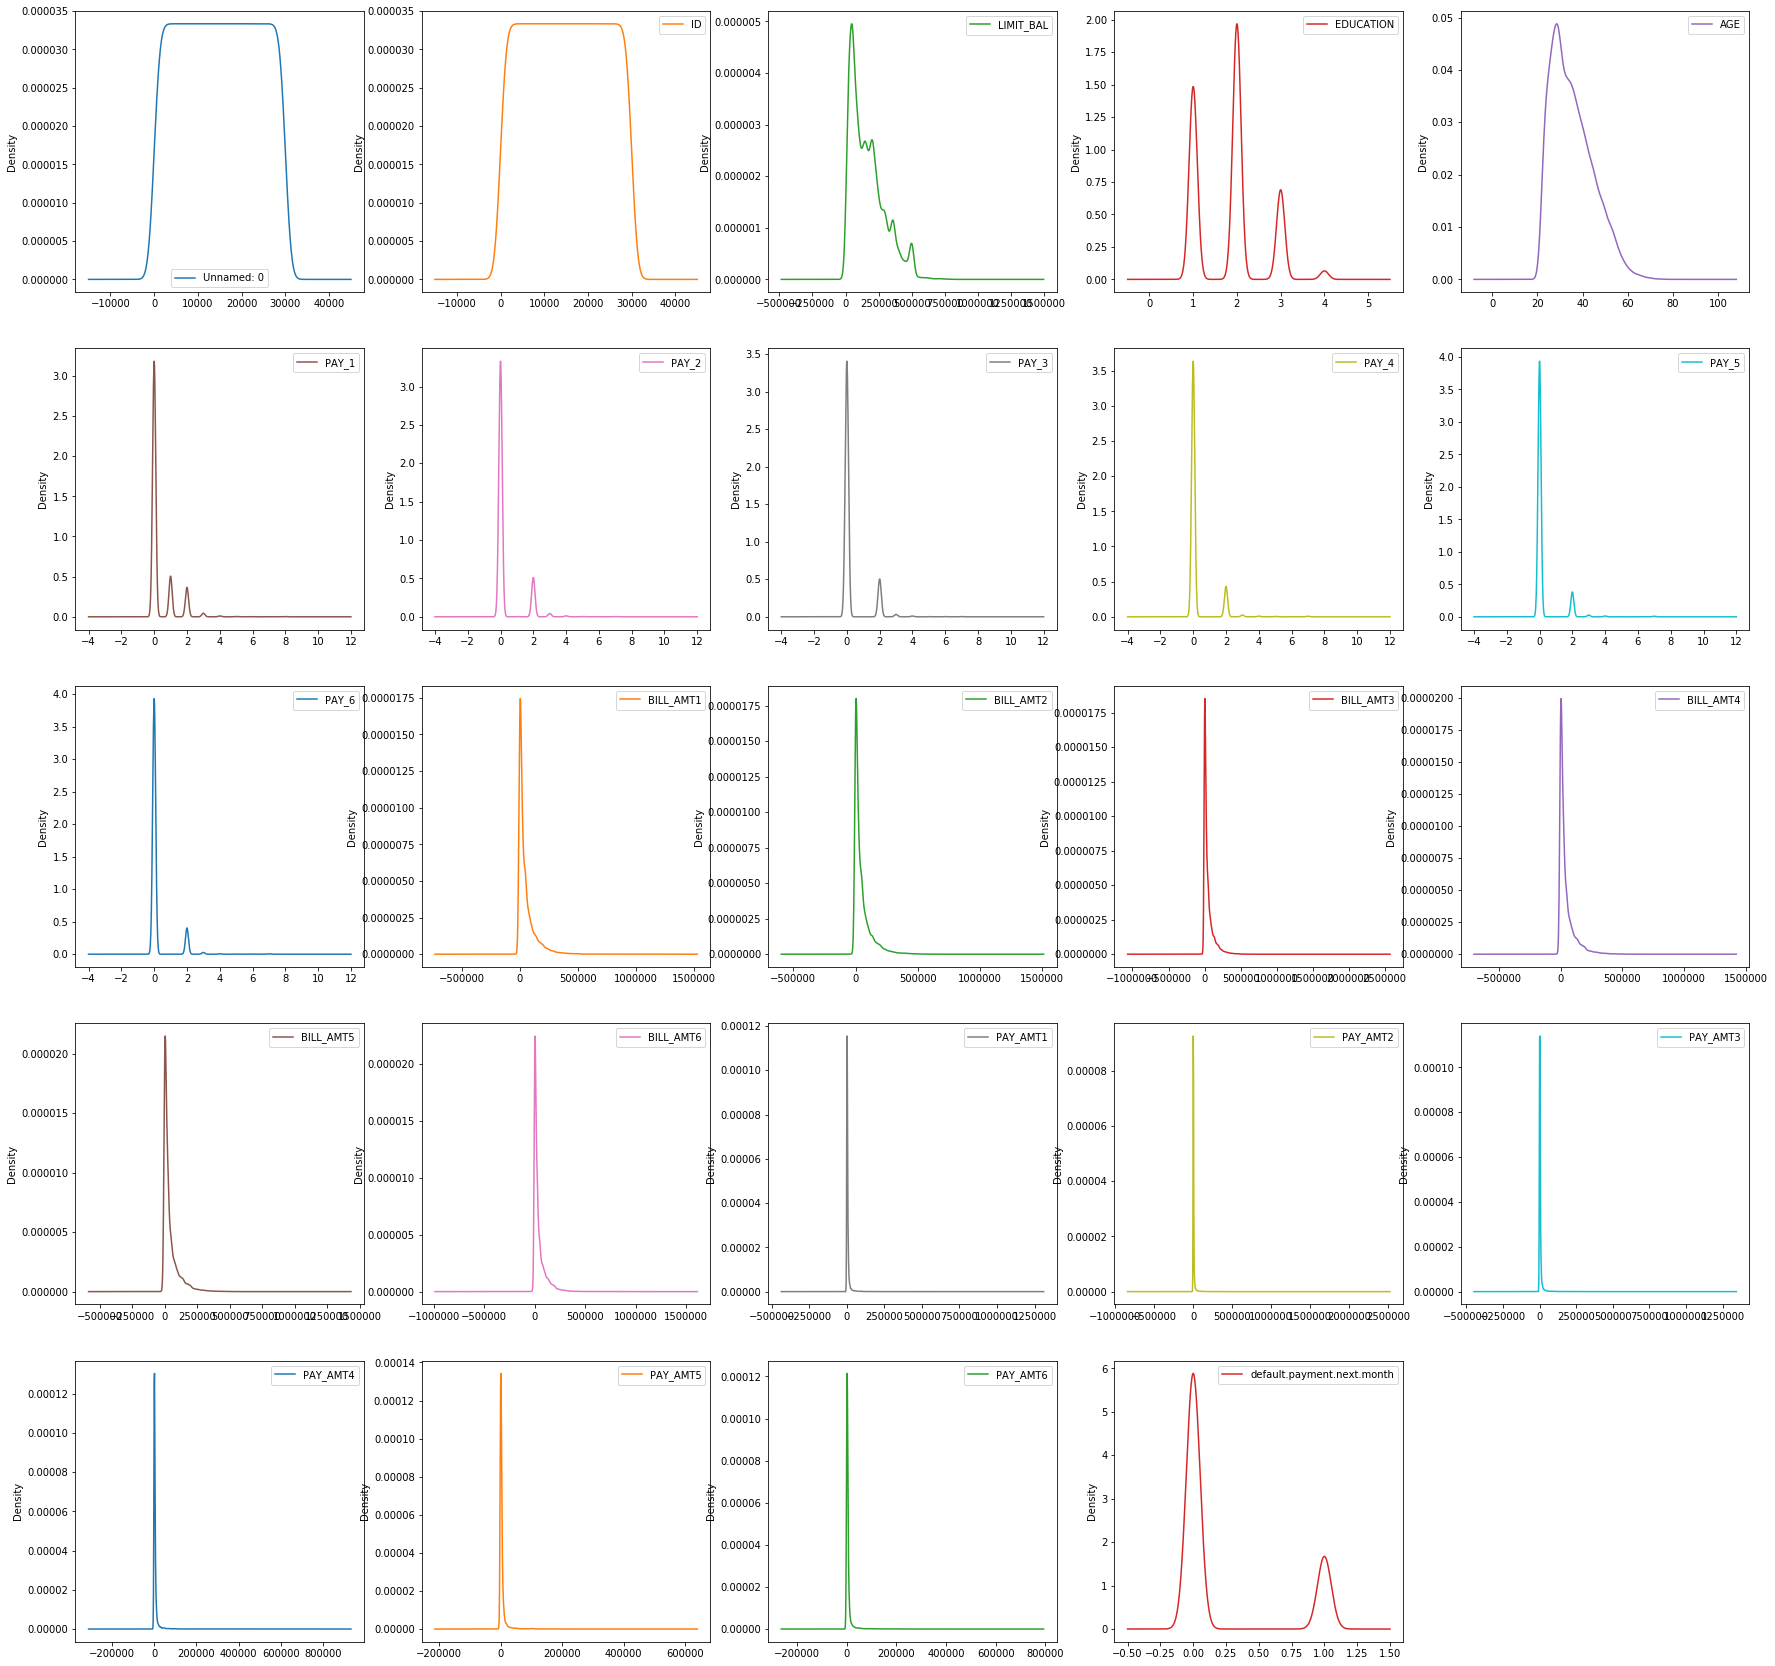

In [8]:
df.plot(
    kind='density',
    subplots=True,
    sharex=False, sharey=False,
    layout=(5,5), figsize=(30,30))
plt.show()

Conclude
- Most variables have a positive skew
- The payment variables (`PAY_AMT1`, `PAY_AMT2`, etc.) are the most right skewed variables

# 2. Exploring Categorical Variables interact with Labels

#### `GENDER`

In [9]:
grouped_df = df[['GENDER','default.payment.next.month']] \
    .groupby(['GENDER','default.payment.next.month']) \
    .size() \
    .unstack()

grouped_df.rename(
    columns={0: 'No', 1: 'Yes'}, inplace=True)

grouped_df

default.payment.next.month,No,Yes
GENDER,,
female,14349,3763
male,9015,2873


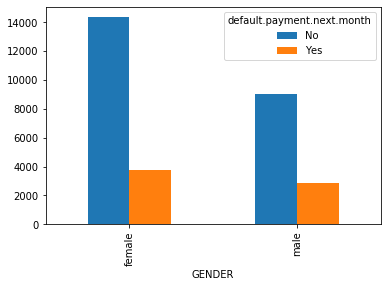

In [10]:
grouped_df.plot(kind='bar')
plt.show()

In [11]:
# Calculate default probabilities
grouped_df['prob_default'] = grouped_df['Yes'] / (grouped_df['No'] + grouped_df['Yes'])
grouped_df

default.payment.next.month,No,Yes,prob_default
GENDER,,,
female,14349,3763,0.207763
male,9015,2873,0.241672


Conclude
- probability of a female defaulting is $\sim$ **21%**
- probability of a male defaulting is $\sim$ **24%**  
$\to$ Male is more likely to default

#### `EDUCATION`

In [12]:
grouped_df = df[['EDUCATION','default.payment.next.month']] \
    .groupby(['EDUCATION','default.payment.next.month']) \
    .size() \
    .unstack()

grouped_df.rename(
    columns={0: 'No', 1: 'Yes'}, inplace=True)

grouped_df

default.payment.next.month,No,Yes
EDUCATION,,
1,8549,2036
2,10700,3330
3,3680,1237
4,435,33


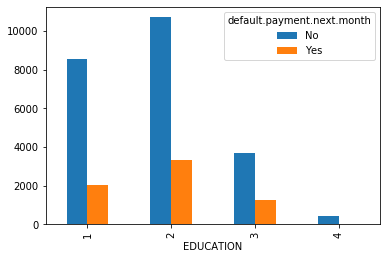

In [13]:
grouped_df.plot(kind='bar')
plt.show()

In [14]:
# Calculate default probabilities
grouped_df['prob_default'] = grouped_df['Yes'] / (grouped_df['No'] + grouped_df['Yes'])
grouped_df

default.payment.next.month,No,Yes,prob_default
EDUCATION,,,
1,8549,2036,0.192348
2,10700,3330,0.237349
3,3680,1237,0.251576
4,435,33,0.070513


Conclude
- probability of a post-graduate defaulting is $\sim$ **19%**
- probability of a uni-graduate defaulting is $\sim$ **24%**  
- probability of a highschool-graduate defaulting is $\sim$ **25%**  
$\to$ highly educated = less likely to default

#### `MARRIAGE` and `GENDER`

In [15]:
grouped_df = df[['MARRIAGE', 'GENDER', 'default.payment.next.month']] \
    .groupby(['MARRIAGE', 'GENDER','default.payment.next.month']) \
    .size() \
    .unstack()

grouped_df.rename(
    columns={0: 'No', 1: 'Yes'}, inplace=True)

grouped_df

default.payment.next.month    No   Yes
MARRIAGE GENDER                       
married  female             6609  1860
         male               3844  1346
other    female              185    47
         male                103    42
single   female             7555  1856
         male               5068  1485

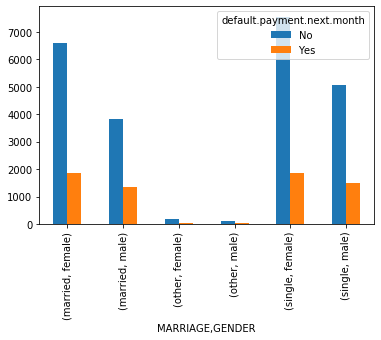

In [16]:
grouped_df.plot(kind='bar')
plt.show()

In [17]:
# Calculate default probabilities
grouped_df['prob_default'] = grouped_df['Yes'] / (grouped_df['No'] + grouped_df['Yes'])
grouped_df

default.payment.next.month    No   Yes  prob_default
MARRIAGE GENDER                                     
married  female             6609  1860      0.219625
         male               3844  1346      0.259345
other    female              185    47      0.202586
         male                103    42      0.289655
single   female             7555  1856      0.197216
         male               5068  1485      0.226614

Conclude
- `MARRIAGE` = other are too small $\to$ neglect
- probability of A single female defaulting is $\sim$ **20%**
- probability of A married male defaulting is $\sim$ **26%**

# 3. Exploring Numerical Variables interact with Labels

#### `AGE`

In [18]:
# Create bins
df['AGE_BIN'] = pd.cut(df['AGE'],
    bins = [20,25,30,35,40,45,50,55,60,65,70,75,80]) 

grouped_df = df[['AGE_BIN','default.payment.next.month']] \
    .groupby(['AGE_BIN','default.payment.next.month']) \
    .size() \
    .unstack()

grouped_df.rename(
    columns={0: 'No', 1: 'Yes'}, inplace=True)

grouped_df

default.payment.next.month,No,Yes
AGE_BIN,,
"(20, 25]",2839.0,1032.0
"(25, 30]",5703.0,1439.0
"(30, 35]",4670.0,1126.0
"(35, 40]",3854.0,1063.0
"(40, 45]",2807.0,798.0
"(45, 50]",1799.0,601.0
"(50, 55]",1072.0,353.0
"(55, 60]",421.0,151.0
"(60, 65]",136.0,50.0


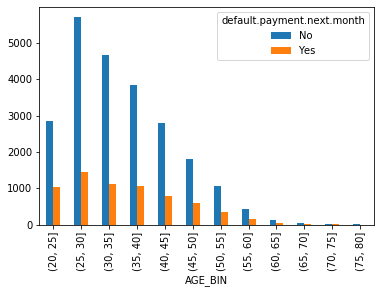

In [19]:
grouped_df.plot(kind='bar')
plt.show()

In [20]:
# Calculate default probabilities
grouped_df['prob_default'] = grouped_df['Yes'] / (grouped_df['No'] + grouped_df['Yes'])
grouped_df

default.payment.next.month,No,Yes,prob_default
AGE_BIN,,,
"(20, 25]",2839.0,1032.0,0.266598
"(25, 30]",5703.0,1439.0,0.201484
"(30, 35]",4670.0,1126.0,0.194272
"(35, 40]",3854.0,1063.0,0.216189
"(40, 45]",2807.0,798.0,0.221359
"(45, 50]",1799.0,601.0,0.250417
"(50, 55]",1072.0,353.0,0.247719
"(55, 60]",421.0,151.0,0.263986
"(60, 65]",136.0,50.0,0.268817


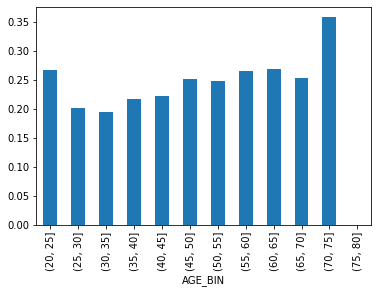

In [21]:
grouped_df['prob_default'].plot(kind='bar')
plt.show()

Conclude
- The 2 groups is likely to default: [20-25], [70-75]
- However the group [70-75] is too small

# 4. Correlation

#### Scatter plots

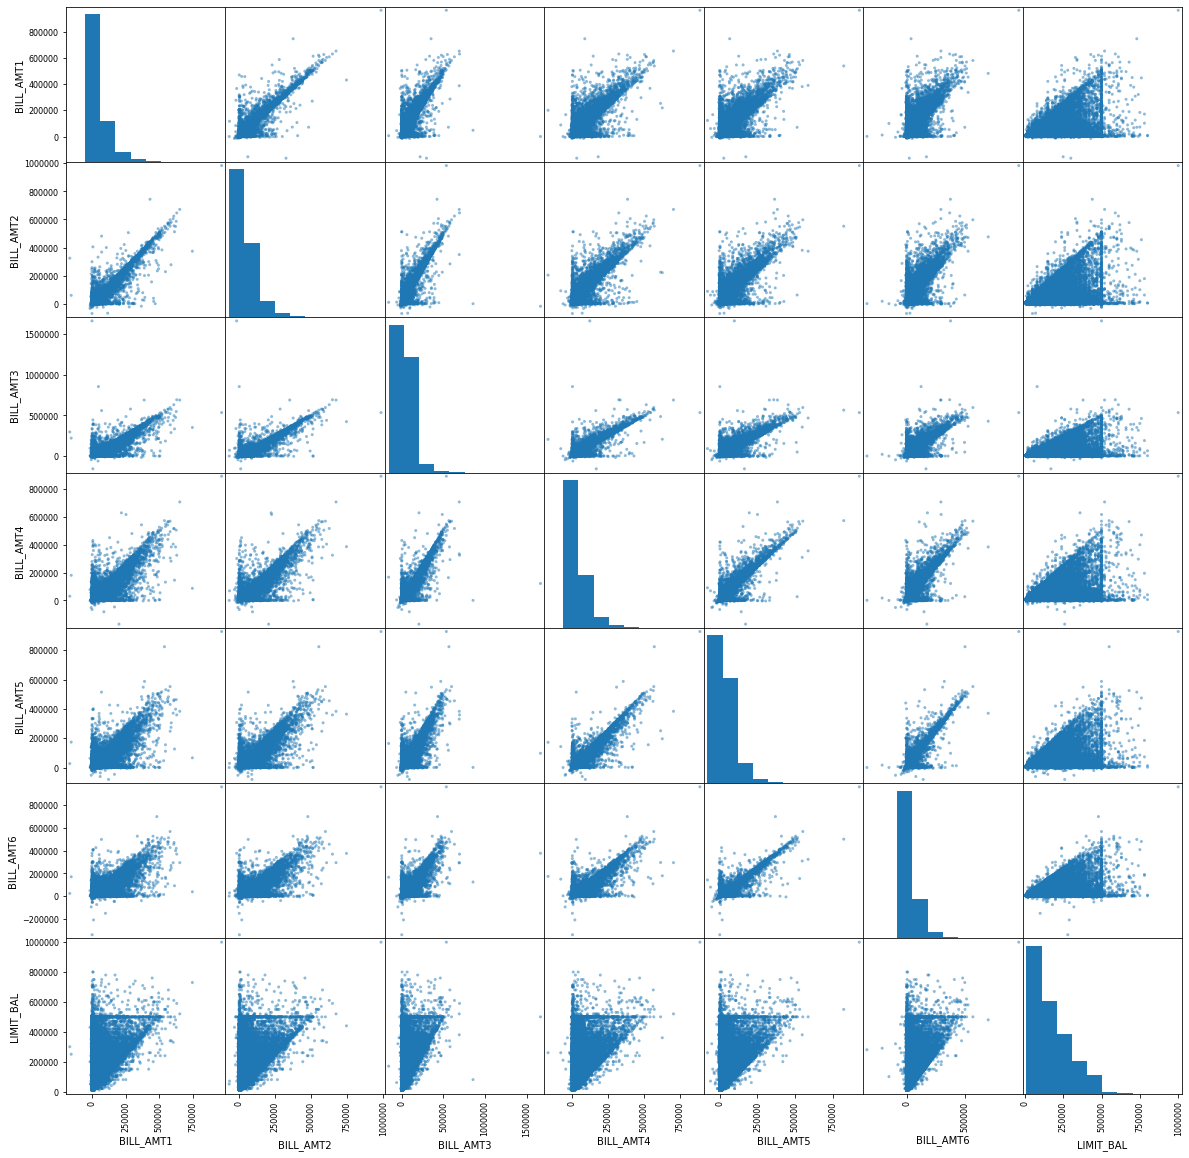

In [22]:
bill_credit_df = df[[
    'BILL_AMT1',
    'BILL_AMT2',
    'BILL_AMT3',
    'BILL_AMT4',
    'BILL_AMT5',
    'BILL_AMT6',
    'LIMIT_BAL']]

pd.plotting.scatter_matrix(bill_credit_df, figsize=(20,20))
plt.show()

Conclude
- There is a linear relationship between `LIMIT_BAL` and all other bill amount variables
    + Increase the bill amounts = the credit given is increased
    + Bank gives more credit to people who spend more usually
    - But there a few exceptions that can be seen from the plots
        + There are a few people who spend very little, yet are given high credits

- As we increase the amount of bills in a month, we are likely to see an increase in the amount of bills the next month  
    + people usually spend similar amounts of money every months
    + If they spend a certain amount in one month, they are expected to spend similar amounts in the next month

#### Correlation and heatmap

In [23]:
# correlation matrix
corr_matrix = df.corr()
corr_matrix.shape

(24, 24)

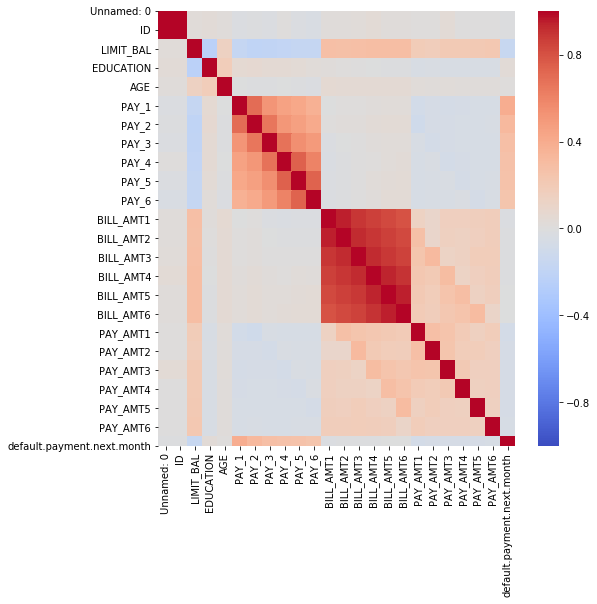

In [24]:
# Visualize corr matrix
plt.subplots(figsize=(8,8))

sns.heatmap(
    data=corr_matrix,
    annot=False,            # write the values on each cell
    vmin = -1.0,            # minimum on the color bar
    vmax = 1.0,             # maximum on the color bar
    cbar=True,              # Draw color bar
    cmap = 'coolwarm')

plt.show()

Conclude
- Bill amount variables(`BILL_AMT1`, `BILL_AMT2`, etc.) are highly correlated with each other
- Payment delay variables (`PAY1`, `PAY2`, etc.) are highly correlated as well
- Some positive correlation between `LIMIT_BAL` and Bill amount variables (`BILL_AMT1`, `BILL_AMT2`, etc.)
    + People who were given more credit tend to have larger bills

- There is a slight negative correlation between `LIMIT_BAL` and payment delay variables (`PAY1`, `PAY2`, etc.)
    + people who are given more credit tend to have fewer payment delays
    + They may earn more credit by paying on-time